MD. Tanvir Jawad <br>ID: 21101221

In [1]:
try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 5.6 MB/s eta 0:00:00


In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [5]:
from modsim import *

In [6]:
def bike_to_wellesley():
    bikeshare.olin -= 1
    bikeshare.wellesley += 1

In [33]:
def bike_to_wellesley(state):
    state.olin -= 1
    state.wellesley += 1

In [8]:
bikeshare = State(olin=10, wellesley=2)
bike_to_wellesley(bikeshare)

In [9]:
bikeshare1 = State(olin=10, wellesley=2)
bikeshare2 = State(olin=2, wellesley=10)

In [11]:
def bike_to_olin(state):
    state.wellesley -= 1
    state.olin += 1
show(bikeshare)

,state
olin,9
wellesley,3


In [12]:
def bike_to_olin(state):
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1


In [13]:
bikeshare = State(olin=12, wellesley=0, wellesley_empty=0)
bike_to_olin(bikeshare)
show(bikeshare)

,state
olin,12
wellesley,0
wellesley_empty,1


In [31]:
def run_simulation(state, p1, p2, num_steps):
    results = TimeSeries()
    results[0] = state.olin

    for i in range(num_steps):
        step(state, p1, p2)
        results[i+1] = state.olin

    results.plot(label='Olin')
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)',
             ylabel='Number of bikes')

In [27]:
def bike_to_wellesley(state):
    state.olin -= 1
    state.wellesley += 1

In [26]:
def bike_to_olin(state):
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1

In [28]:
def step(state, p1, p2):
    """Simulate one time step.

    state: bikeshare State object
    p1: probability of an Olin->Wellesley ride
    p2: probability of a Wellesley->Olin ride
    """
    if flip(p1):
        bike_to_wellesley(state)

    if flip(p2):
        bike_to_olin(state)

In [29]:
def bike_to_wellesley(state):
    if state.olin == 0:
        state.olin_empty += 1
        return
    state.olin -= 1
    state.wellesley += 1
bikeshare = State(olin=0, wellesley=12,olin_empty=0, wellesley_empty=0)
bike_to_wellesley(bikeshare)
show(bikeshare)

,state
olin,0
wellesley,12
olin_empty,1
wellesley_empty,0


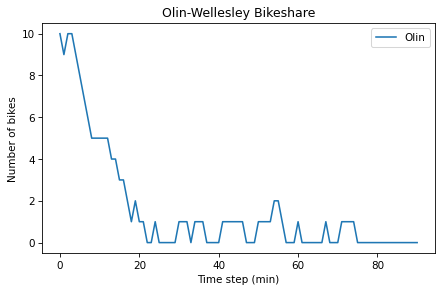

In [30]:
bikeshare = State(olin=10, wellesley=2,olin_empty=0, wellesley_empty=0)
run_simulation(bikeshare, 0.6, 0.2, 90)